In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.decomposition import PCA
from xgboost import XGBRegressor


In [3]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [4]:
cancer_data= pd.read_csv('cancer.csv', index_col='Id')
cancer_data.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [ ]:
cancer_data = pd.read_csv('cancer.csv', index_col='Id')
cancer_data['Diagnosis'] = cancer_data['Diagnosis'].map({'B': 0, 'M': 1})
X = cancer_data.drop(columns=['Diagnosis'])
y = cancer_data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# mae_score = mean_squared_error(cancer_data['Diagnosis'])
# print(f'Mean Absolute Error (MAE): {mae_score:.4f}')

# print(f'Accuracy: {accuracy:.4f}')
# print('Classification Report:\n', report)


# Mutual information

In [7]:
def make_mi_scores(X,y):
    X=X.copy()
    for col in X.select_dtypes(['object', 'category']):
        X[col], _ = X[col].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
        

In [8]:
X=cancer_data.copy()
y=X.pop('Diagnosis')

mi_scores = make_mi_scores(X, y)

Perimeter (worst)            0.477912
Area (worst)                 0.463259
Radius (worst)               0.450062
Concave points (mean)        0.443645
Concave points (worst)       0.440104
Perimeter (mean)             0.403109
Concavity (mean)             0.374227
Radius (mean)                0.368963
Area (mean)                  0.359584
Area (se)                    0.337488
Concavity (worst)            0.319574
Perimeter (se)               0.273345
Radius (se)                  0.244698
Compactness (worst)          0.226846
Compactness (mean)           0.212138
Concave points (se)          0.125492
Texture (worst)              0.120281
Concavity (se)               0.118411
Texture (mean)               0.101338
Smoothness (worst)           0.100768
Symmetry (worst)             0.091617
Smoothness (mean)            0.086846
Compactness (se)             0.075755
Fractal dimension (worst)    0.067243
Symmetry (mean)              0.064916
Fractal dimension (se)       0.037480
Smoothness (

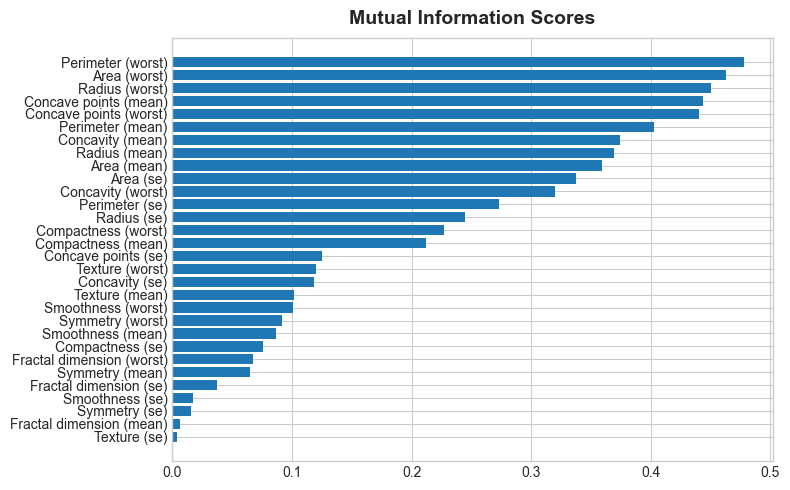

In [11]:
print(mi_scores)


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)        

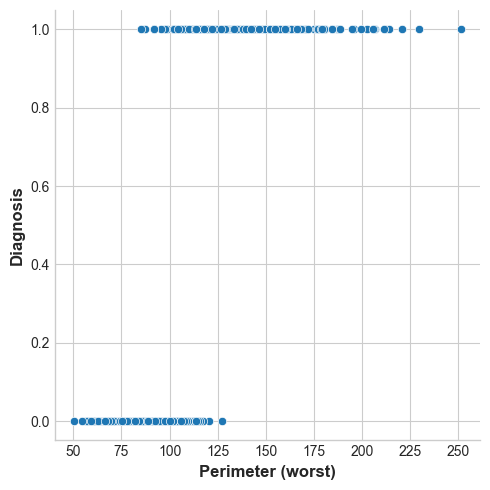

In [18]:
sns.relplot(x='Perimeter (worst)', y='Diagnosis', data=cancer_data)

In [19]:
X = cancer_data[features]
X.head()

,Radius (mean),Area (mean),Concave points (mean)
Id,,,
8510426,13.540,566.3,0.047810
8510653,13.080,520.0,0.031100
8510824,9.504,273.9,0.020760
854941,13.030,523.8,0.029230
85713702,8.196,201.9,0.005917


In [20]:

kmeans= KMeans(n_clusters=10,n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X)
X.head()



C:\Users\DELL\AppData\Local\Temp\ipykernel_10844\745596633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = kmeans.fit_predict(X)


,Radius (mean),Area (mean),Concave points (mean),Cluster
Id,,,,
8510426,13.540,566.3,0.047810,9
8510653,13.080,520.0,0.031100,4
8510824,9.504,273.9,0.020760,0
854941,13.030,523.8,0.029230,4
85713702,8.196,201.9,0.005917,0


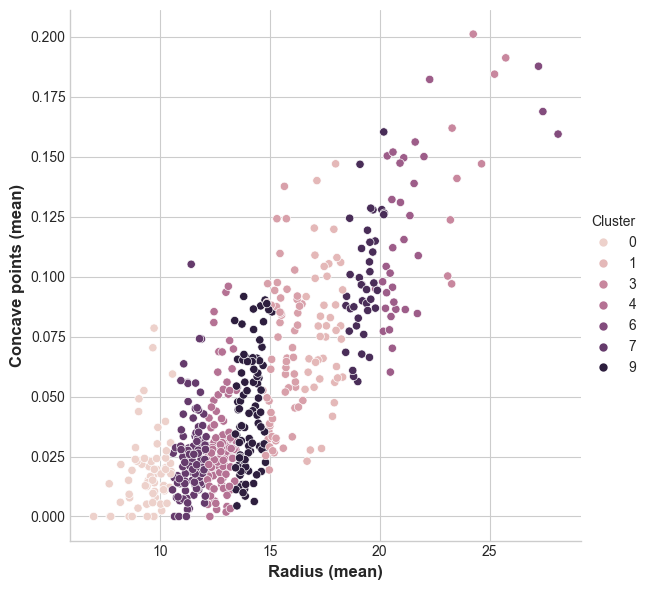

In [21]:
sns.relplot(
    x="Radius (mean)", y="Concave points (mean)", hue="Cluster", data=X, height=6,
)

In [ ]:
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)


kmeans = KMeans(n_clusters=2, random_state=42)
X_cd = kmeans.fit_transform(X_scaled)

cancer_data['Cluster'] = kmeans.labels_

print('Cluster assignment:\n', cancer_data['Cluster'].value_counts())

Cluster assignment:
 Cluster
0    423
1    146
Name: count, dtype: int64


In [27]:
def apply_pca(X , standardize=True):
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    pca = PCA()
    X_pca = pca.fit_transform(X)
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    loading = pd.DataFrame(
        pca.components_.T,
        columns=component_names,
        index=X.columns,
    )
    return pca, X_pca, loading

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

    

In [ ]:
feature_weights = {
    'Perimeter (worst)': 0.0859,
    'Area (worst)': 0.0833,
    'Radius (worst)': 0.0809,
    'Concave points (mean)': 0.0798,
    'Concave points (worst)': 0.0791,
    'Perimeter (mean)': 0.0725,
    'Concavity (mean)': 0.0673,
    'Radius (mean)': 0.0663,
    'Area (mean)': 0.0647,
    'Area (se)': 0.0607,
    'Concavity (worst)': 0.0575,
    'Perimeter (se)': 0.0491,
    'Radius (se)': 0.0440,
    'Compactness (worst)': 0.0408,
    'Compactness (mean)': 0.0381,
    'Concave points (se)': 0.0226,
    'Texture (worst)': 0.0216,
    'Concavity (se)': 0.0213,
    'Texture (mean)': 0.0182,
    'Smoothness (worst)': 0.0181
}

default_weight = np.mean(list(feature_weights.values())) 

all_features = X.columns.tolist()
for feature in all_features:
    if feature not in feature_weights:
        feature_weights[feature] = default_weight
        print(f"weight{default_weight:.4f} for'{feature}' is done")

weights = np.array([feature_weights[col] for col in X.columns])

X_train_weighted = X_train * weights
X_test_weighted = X_test * weights

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_weighted, y_train)


y_pred = rf_model.predict(X_test_weighted)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

weight0.0536 for'Smoothness (mean)' is done
weight0.0536 for'Symmetry (mean)' is done
weight0.0536 for'Fractal dimension (mean)' is done
weight0.0536 for'Texture (se)' is done
weight0.0536 for'Smoothness (se)' is done
weight0.0536 for'Compactness (se)' is done
weight0.0536 for'Symmetry (se)' is done
weight0.0536 for'Fractal dimension (se)' is done
weight0.0536 for'Symmetry (worst)' is done
weight0.0536 for'Fractal dimension (worst)' is done

Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

